In [ ]:
import numpy as np

#COEFICIENTES DE REFLEXION DE FRESNEL

##Coeficiente de reflexion para medio semi-infinito

Reflexion para medio dielectrico semi-infinito con ϵ 

\begin{equation}
  R=\frac{1-\sqrt{ϵ}}{1+\sqrt{ϵ}}
\end{equation}

COMMENT: con las cuentas que tengo hechas nunca depende de la frecuencia... pero es realista eso??

In [ ]:
def R_1capa(ep):
  '''
  Coeficiente de reflexion de fresnell (capa seminf)
  obs: no depende de la frecuencia
  
    Entradas:
    -ep: Epsilon (cte dielectrica del medio)

    Salidas:
    -R

  '''
  r=(np.sqrt(ep)-1)/(np.sqrt(ep)+1)

  return r

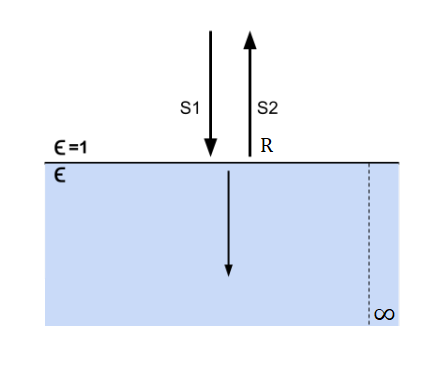

##Aproximación para medio semi-infinito con $\epsilon(\omega)$
Vamos a asumir que si iluminamos tierra, por la humedad de la misma va a estar estratificada

##\begin{equation}
  R(f)=\frac{R_{12}+R_{23}e^{2i\phi}}{1+R_{12}R_{23}e^{2i\phi}}
\end{equation}
donde 
##\begin{cases}
  R_{12}=\frac{1-\sqrt{ϵ_1}}{1+\sqrt{ϵ_1}}\\
  R_{23}=\frac{\sqrt{ϵ_1}-\sqrt{ϵ_2}}{\sqrt{ϵ_1}+\sqrt{ϵ_2}}\\
  \phi=k_2d=(\frac{2\pi f}{c})\sqrt{ϵ_1}d
\end{cases}

obs: como queremos estimar los epsilon y no sabemos la distancia d especifica en donde se "diferencian" las capas, vamos a hacer un barrido en $ϵ_1$, $ϵ_2$ y d y buscar la combinacion de los 3 valores que mejor ajuste a la señal que levantamos. 


In [ ]:
def R_2capas(ep1, ep2, d, f):
  '''
  Coeficiente de reflexion de fresnell 2 interfases
    Entradas:
    -ep1: ϵ de la 1ra capa
    -ep2: ϵ de la 2da capa
    -d: ancho de la 1er capa
    -f: frecuencia incidente

    Salidas:
    -R

  '''
  phi = (2*np.pi*f*np.sqrt(ep1)*d)/3e8
  R12 = (1-np.sqrt(ep1))/(1+np.sqrt(ep1))
  R23 = (np.sqrt(ep1)-np.sqrt(ep2))/(np.sqrt(ep1)+np.sqrt(ep2))

  a = R12+R23*np.exp(2*1j*phi)
  b = 1+R12*R23*np.exp(2*1j*phi)

  R = a/b
  return R

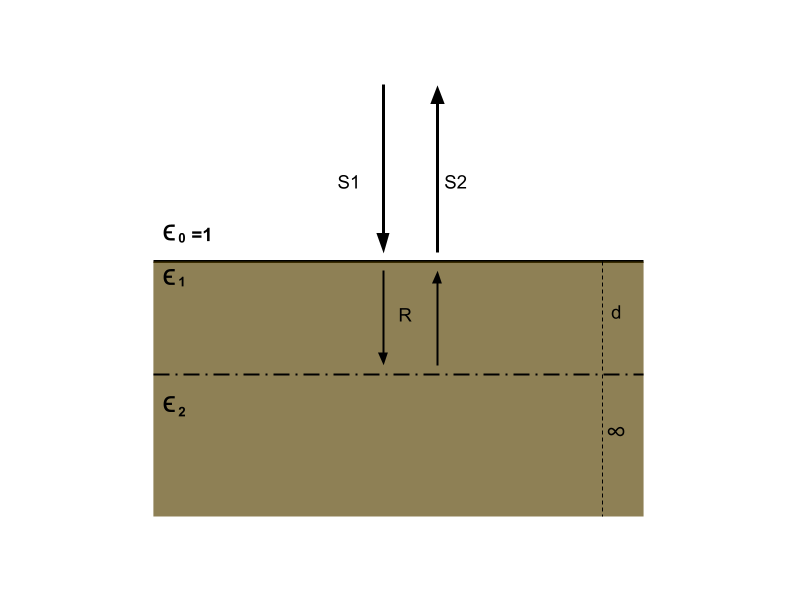

##Coef de reflexion para medios estratificados (3 capas)

#\begin{align}
  \mathbb{R_0}&=\frac{R_0+\mathbb{R_1}e^{-2i\phi_1}}{1+R_0\mathbb{R_1}e^{-2i\phi_1}}\\
  \\
  \mathbb{R_1}&=\frac{1+\mathbb{R_2}e^{-2i\phi_2}}{1+R_1\mathbb{R_2}e^{-2i\phi_2}}\\
\end{align}
donde 

##\begin{cases}
  \phi_1=\frac{2\pi f}{c}\sqrt{ϵ_1}d_1\\
  \phi_2=\frac{2\pi f}{c}\sqrt{ϵ_2}d_2\\
\end{cases}

con

##\begin{equation}
  \mathbb{R_2}=R_2=\frac{\sqrt{ϵ_2}-\sqrt{ϵ_3}}{\sqrt{ϵ_2}+\sqrt{ϵ_3}}\:\:\:\:\:\:\:,\:\:R_1=\frac{\sqrt{ϵ_1}-\sqrt{ϵ_2}}{\sqrt{ϵ_1}+\sqrt{ϵ_2}}\:\:\:\:\:\:\:,\:\:R_0=\frac{1-\sqrt{ϵ_1}}{1+\sqrt{ϵ_1}}
\end{equation}



In [ ]:
def R_3capas(ep1, ep2, ep3, d1, d2, f):
  '''
  Coeficiente de reflexion de fresnell 2 interfases
    Entradas:
    -ep1: ϵ de la 1ra capa
    -ep2: ϵ de la 2da capa
    -ep: ϵ de la 3ra capa
    -d1: ancho de la 1er capa
    -d2: ancho de la 2da capa
    -f: frecuencia incidente

    Salidas:
    -R
  '''
  phi1 = (2*np.pi*f*np.sqrt(ep1)*d1)/3e8
  phi2 = (2*np.pi*f*np.sqrt(ep2)*d2)/3e8
  R0 = (1-np.sqrt(ep1))/(1+np.sqrt(ep1))
  R1 = (np.sqrt(ep1)-np.sqrt(ep2))/(np.sqrt(ep1)+np.sqrt(ep2))
  R2 = (np.sqrt(ep2)-np.sqrt(ep3))/(np.sqrt(ep2)+np.sqrt(ep3))

  RR1=(R1+R2*np.exp(-2*1j*phi2))/(1+R1*R2*np.exp(-2*1j*phi2))

  a = R0+RR1*np.exp(-2*1j*phi1)
  b = 1+R0*RR1*np.exp(-2*1j*phi1)

  R = a/b
  return R

## Coeficiente de reflexión a incidencia normal y conductor ideal

target de espesor *d* y constante dieléctrica *ep* y conductor ideal debajo del dieléctrico.

#\begin{equation}
  R(f)=\frac{1-\sqrt{\epsilon}+(1+\sqrt{\epsilon})e^{\phi}}{1+\sqrt{\epsilon}+(1-\sqrt{\epsilon})e^{\phi}}
\end{equation}
con

##\begin{cases}
Φ=2i\sqrt{\epsilon} k_id\\
k_i=\frac{2\pi f}{c}
\end{cases}



In [ ]:
def R_chapa(ep,d,fi): #Solo valido para frecuencias positivas.

  '''
  Coeficiente de reflexion de fresnell (1 capa)
    Entradas:
    -ep: Epsilon (cte dielectrica del medio)
    -d: ancho de la capa
    -fi: frecuencia incidente

    Salidas:
    -R

  '''
  ki = 2*np.pi*fi/3e8  
  f = 2*1j*np.sqrt(ep)*ki*d

  a = 1-np.sqrt(ep)+(1+np.sqrt(ep))*np.exp(f)
  b = 1+np.sqrt(ep)+(1-np.sqrt(ep))*np.exp(f)

  R=a/b
  return R

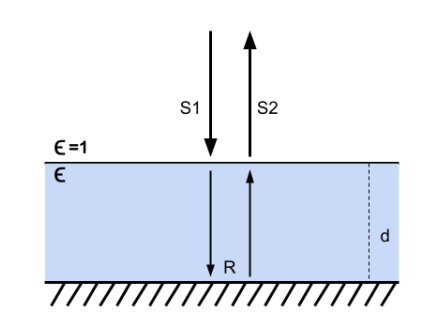

## Coeficiente de reflexión a incidencia normal y conductor real

target de espesor $d$ ,constante dieléctrica $\epsilon_1$ y conductor real con conductividad $\sigma(\omega)$.

relacionando ω con la frecuencia que tenemos nosotros usando ω=2πf 
#\begin{equation}
  R=\frac{r+(1-\sqrt{\frac{2ω}{πσ}})e^Φ}{1+r(1-\sqrt{\frac{2ω}{πσ}})e^Φ}
\end{equation}

con
##\begin{cases}
  r=\frac{\sqrt{ϵ}-1}{\sqrt{ϵ}+1}\\
  Φ=2i(\sqrt{ϵ}\frac{ω}{c})d\\
\end{cases}

In [ ]:
def R_ep_cond(ep,d,sigma,f):

  '''
  R incidencia normal en conductor real (1 capa)
     Entradas:
     -ep: Epsilon(cte dieléctrica del medio)
     -d: Ancho de la capa
     -sigma: conductividad sigma (dep de la frecuencia)
     -f: frecuencia

     Salidas:
     r: coef de reflexion
  '''

  w = 2*np.pi*f
  ki = w/3e8
  k1 = np.sqrt(ep)*ki

  r01 = (np.sqrt(ep)-1)/(np.sqrt(ep)+1)
  #ep_c = 1 + 1j*4*np.pi*sigma/w 
  #r1c = (np.sqrt(ep_c)-np.sqrt(ep1))/(np.sqrt(ep_c)+np.sqrt(ep1))
  delta = 3e8/np.sqrt(2*np.pi*sigma*w)
  r1c = 1-2*w*delta/3e8

  fase = 2*1j*k1*d

  a = r01+r1c*np.exp(fase)
  b = 1+r01*r1c*np.exp(fase)
  r = a/b

  return r

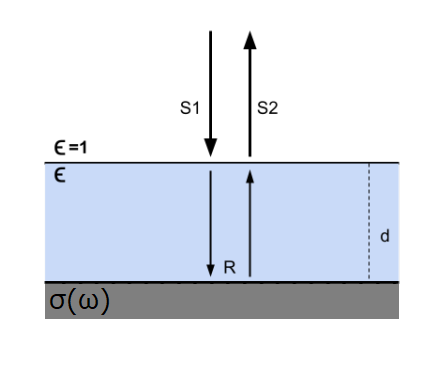